# library install

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

# definitions

In [2]:
# スペクトル密度関数: AR(1)
def spectrum_density_ar1(phi, sigma2, lambdas):
    return (sigma2 / (2 * np.pi)) * (1 / (1 + phi**2 - 2 * phi * np.cos(lambdas)))

# スペクトル密度関数: MA(1)
def spectrum_density_ma1(theta, sigma2, lambdas):
    return (sigma2 / (2 * np.pi)) * (1 + theta**2 + 2 * theta * np.cos(lambdas))

# スペクトル密度関数: ARMA(1,1)
def spectrum_density_arma11(phi, theta, sigma2, lambdas):
    return (sigma2 / (2 * np.pi)) * ((1 + theta**2 + 2 * theta * np.cos(lambdas)) / (1 + phi**2 - 2 * phi * np.cos(lambdas)))

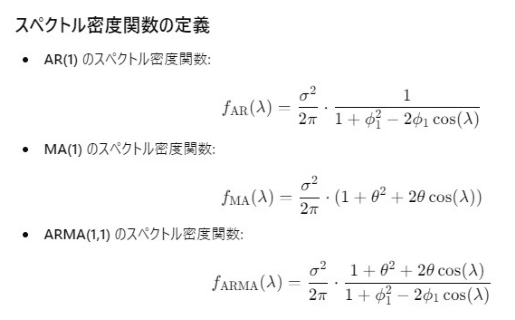

In [3]:
# 画像ファイルのパス
image_path = 'fomulas_1.jpg'

# 画像を読み込み
img = mpimg.imread(image_path)

# 画像を表示
plt.imshow(img)
plt.axis('off')  # 軸を非表示に
plt.show()

In [4]:
# 時系列をプロットする関数
def plot_time_series(series, ax, title):
    ax.plot(series)
    ax.set_title(title)
    ax.grid(True)

# コレログラム(自己相関関数)をプロットする関数
def plot_acf(series, lags, ax, title):
    sm.graphics.tsa.plot_acf(series, lags=lags, ax=ax)
    ax.set_title(title)

# 偏自己相関関数をプロットする関数
def plot_pacf(series, lags, ax, title):
    sm.graphics.tsa.plot_pacf(series, lags=lags, ax=ax)
    ax.set_title(title)

# スペクトル密度関数をプロットする関数（AR, MA, ARMA対応）
def plot_spectrum_ar(series, ax, phi, sigma2=1):
    lambdas = np.linspace(0, np.pi, 500)
    f_lambda = spectrum_density_ar1(phi, sigma2, lambdas)
    ax.plot(lambdas, f_lambda)
    ax.set_title(f'AR(1) Spectrum (phi={phi})')
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel(r'$f_{\text{AR}}(\lambda)$')
    ax.grid(True)

def plot_spectrum_ma(series, ax, theta, sigma2=1):
    lambdas = np.linspace(0, np.pi, 500)
    f_lambda = spectrum_density_ma1(theta, sigma2, lambdas)
    ax.plot(lambdas, f_lambda)
    ax.set_title(f'MA(1) Spectrum (theta={theta})')
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel(r'$f_{\text{MA}}(\lambda)$')
    ax.grid(True)

def plot_spectrum_arma(series, ax, phi, theta, sigma2=1):
    lambdas = np.linspace(0, np.pi, 500)
    f_lambda = spectrum_density_arma11(phi, theta, sigma2, lambdas)
    ax.plot(lambdas, f_lambda)
    ax.set_title(f'ARMA(1,1) Spectrum (phi={phi}, theta={theta})')
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel(r'$f_{\text{ARMA}}(\lambda)$')
    ax.grid(True)

In [5]:
# AR(1) モデルの時系列データ生成
def generate_ar1(phi, n):
    ar = np.array([1, -phi])  # AR(1)の係数
    ma = np.array([1])        # MA(0)
    arma_process = ArmaProcess(ar, ma)
    return arma_process.generate_sample(nsample=n)

# MA(1) モデルの時系列データ生成
def generate_ma1(theta, n):
    ar = np.array([1])        # AR(0)
    ma = np.array([1, theta]) # MA(1)の係数
    arma_process = ArmaProcess(ar, ma)
    return arma_process.generate_sample(nsample=n)

# ARMA(1,1) モデルの時系列データ生成
def generate_arma11(phi, theta, n):
    ar = np.array([1, -phi])   # AR(1)の係数
    ma = np.array([1, theta])  # MA(1)の係数
    arma_process = ArmaProcess(ar, ma)
    return arma_process.generate_sample(nsample=n)

# param setting

In [6]:
# パラメータ設定
n_samples = 60  # サンプル数
thetas = [-0.7, 0, 0.4, 0.7]  # thetaの値 (MA(1) 用)
phis = [-0.7, 0, 0.4, 0.7]    # phiの値 (AR(1), ARMA(1,1) 用)

# AR(1)

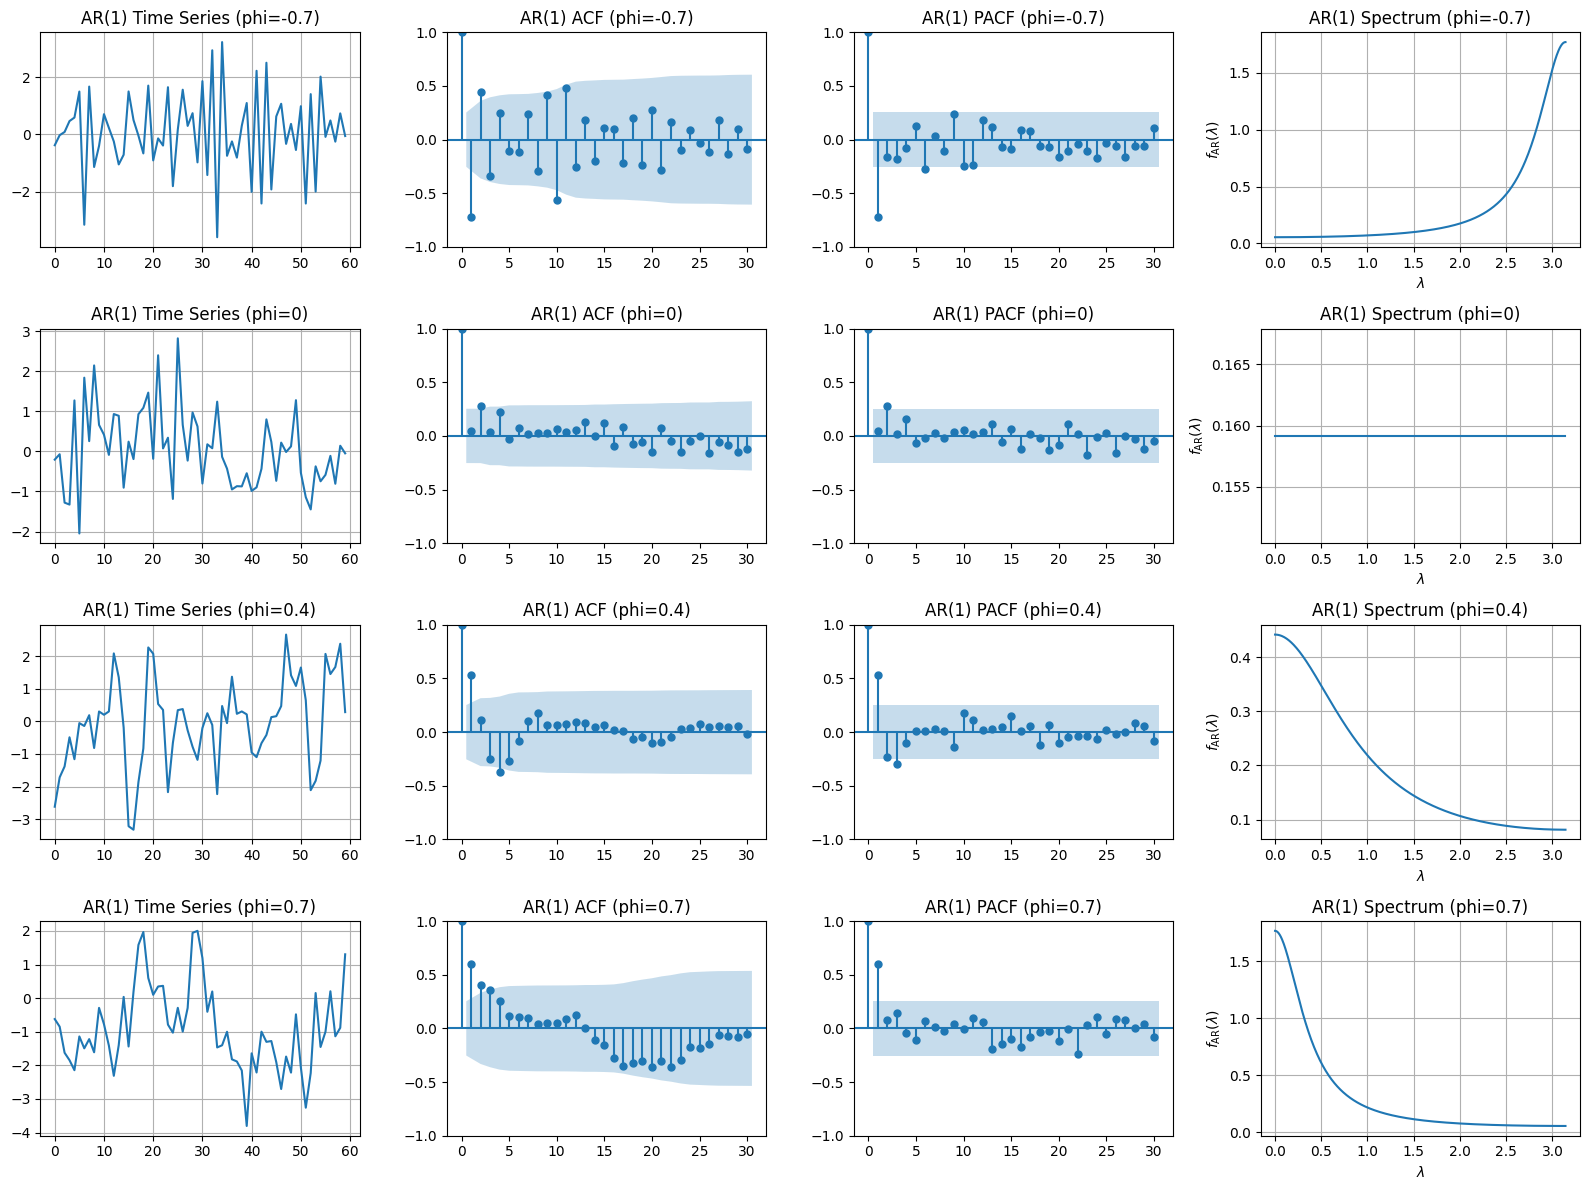

In [7]:
# AR(1) モデルの可視化
fig, axes = plt.subplots(len(phis), 4, figsize=(16, 12))  # 4列に分割したサブプロット

for i, phi in enumerate(phis):
    # AR(1)時系列データ生成
    ar1_series = generate_ar1(phi=phi, n=n_samples)
    
    # 各プロット
    plot_time_series(ar1_series, axes[i, 0], f'AR(1) Time Series (phi={phi})')
    plot_acf(ar1_series, lags=30, ax=axes[i, 1], title=f'AR(1) ACF (phi={phi})')
    plot_pacf(ar1_series, lags=30, ax=axes[i, 2], title=f'AR(1) PACF (phi={phi})')
    plot_spectrum_ar(ar1_series, ax=axes[i, 3], phi=phi)

# グラフを調整して表示
plt.tight_layout()
plt.show()

# MA(1)

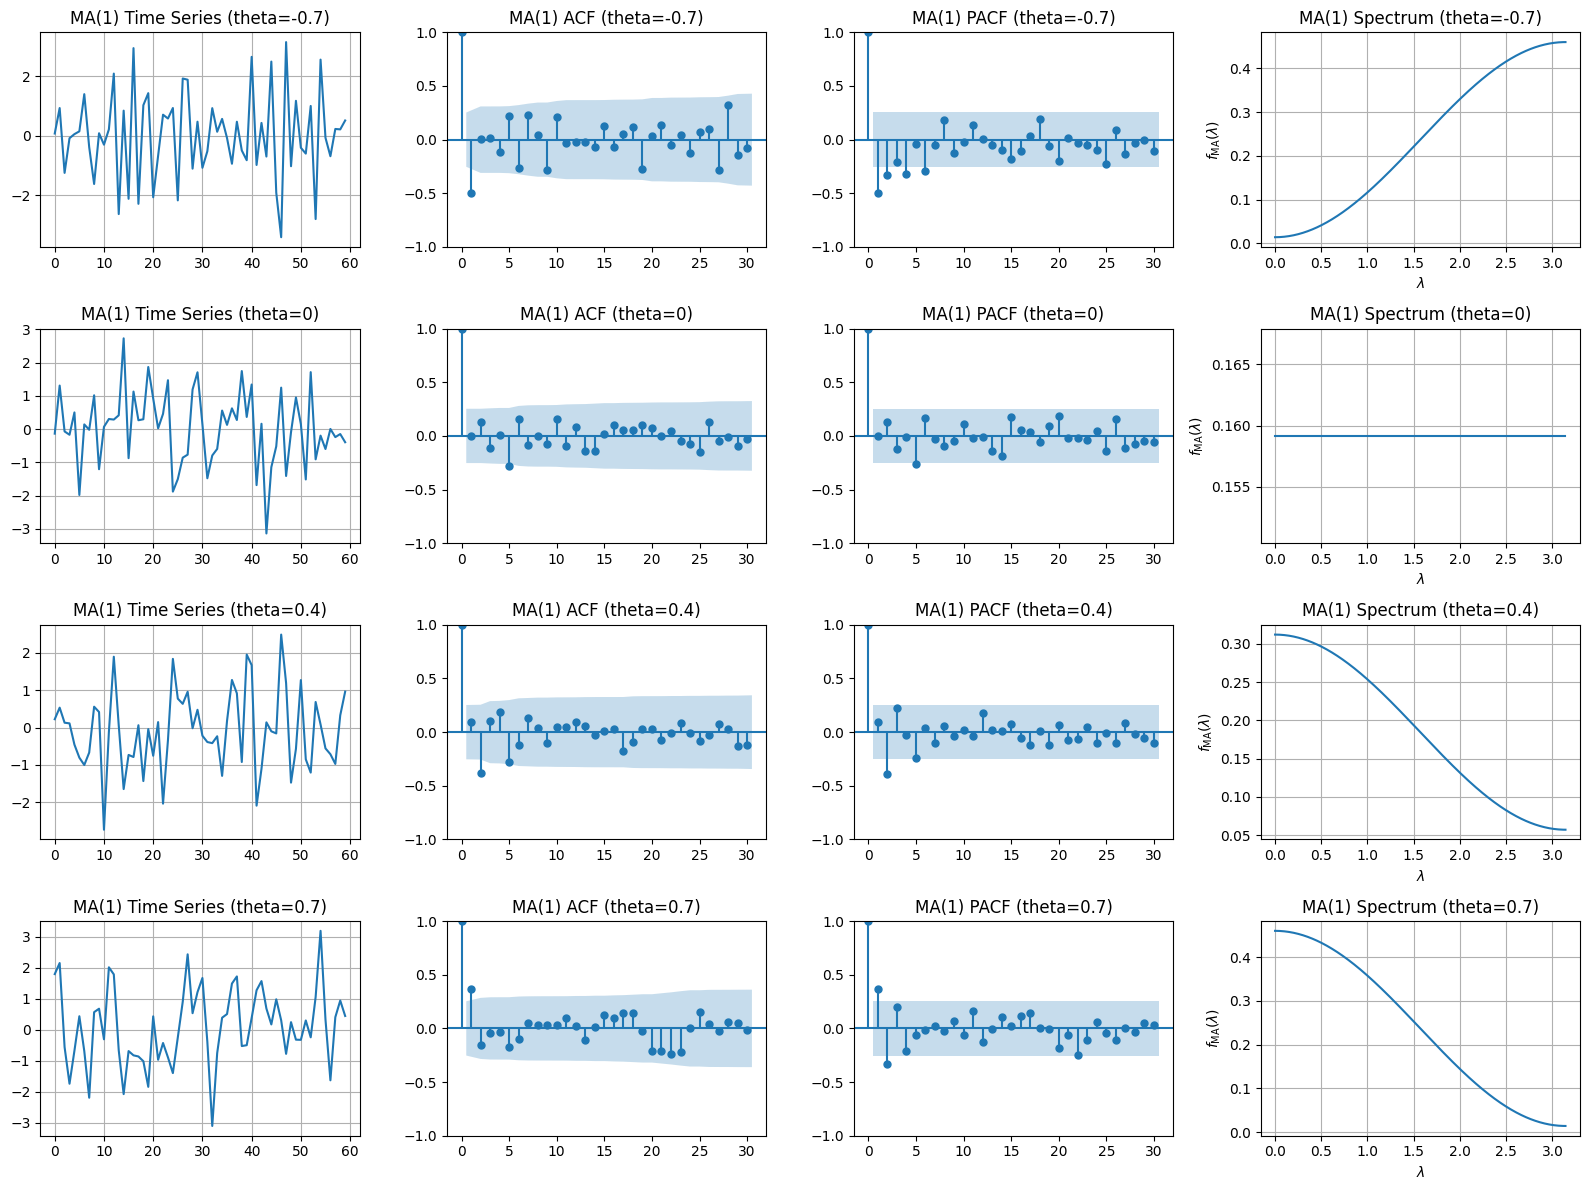

In [8]:
# MA(1) モデルの可視化
fig, axes = plt.subplots(len(thetas), 4, figsize=(16, 12))  # 4列に分割したサブプロット

for i, theta in enumerate(thetas):
    # MA(1)時系列データ生成
    ma1_series = generate_ma1(theta=theta, n=n_samples)
    
    # 各プロット
    plot_time_series(ma1_series, axes[i, 0], f'MA(1) Time Series (theta={theta})')
    plot_acf(ma1_series, lags=30, ax=axes[i, 1], title=f'MA(1) ACF (theta={theta})')
    plot_pacf(ma1_series, lags=30, ax=axes[i, 2], title=f'MA(1) PACF (theta={theta})')
    plot_spectrum_ma(ma1_series, ax=axes[i, 3], theta=theta)

# グラフを調整して表示
plt.tight_layout()
plt.show()

# ARMA(1,1)

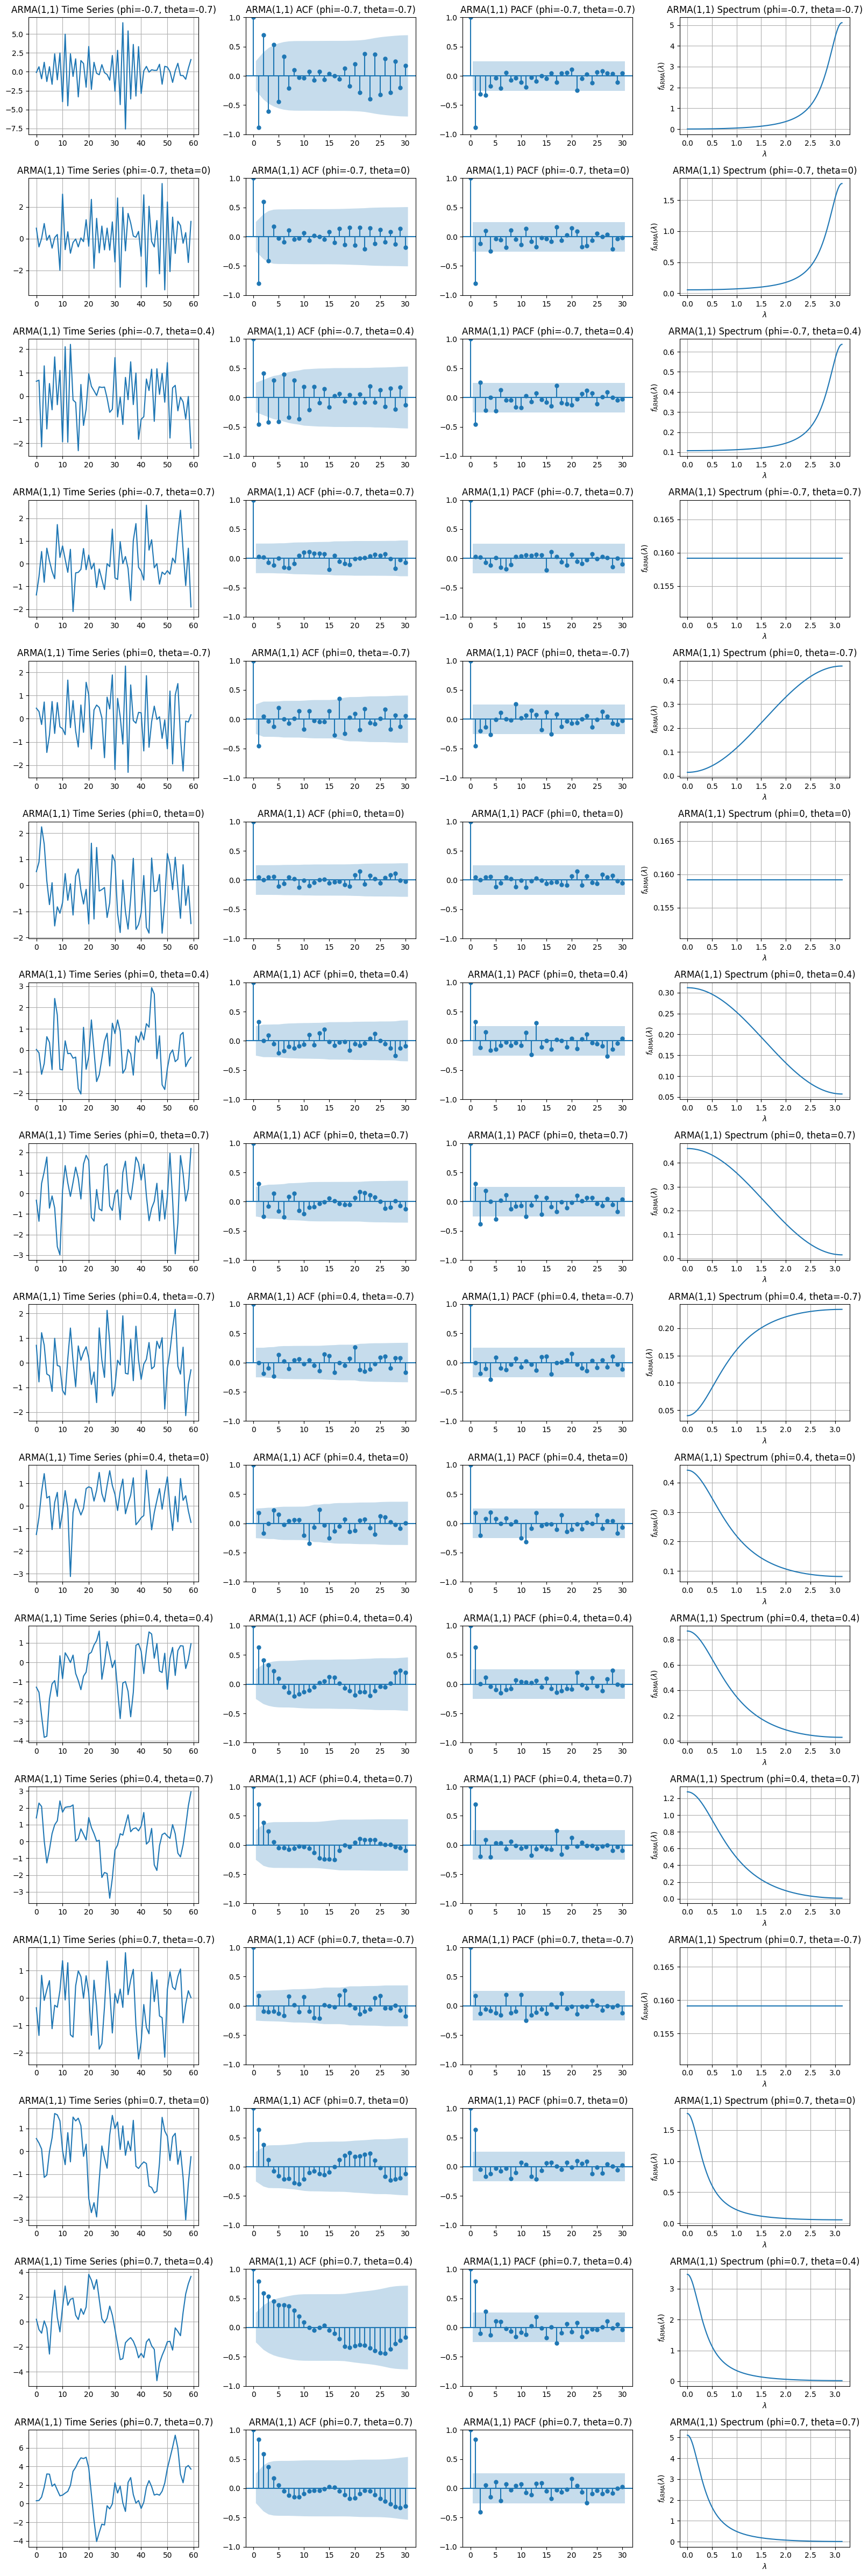

In [9]:
# 行列形式でプロットするためのサブプロット設定
fig, axes = plt.subplots(len(phis)*len(thetas), 4, figsize=(16, len(phis)*len(thetas) * 3))  # 4列に分割したサブプロット

# 二重ループで φ と θ のすべての組み合わせを走査
row = 0
for phi in phis:
    for theta in thetas:
        # ARMA(1,1)時系列データ生成
        arma11_series = generate_arma11(phi=phi, theta=theta, n=n_samples)
        
        # 各プロット
        plot_time_series(arma11_series, axes[row, 0], f'ARMA(1,1) Time Series (phi={phi}, theta={theta})')
        plot_acf(arma11_series, lags=30, ax=axes[row, 1], title=f'ARMA(1,1) ACF (phi={phi}, theta={theta})')
        plot_pacf(arma11_series, lags=30, ax=axes[row, 2], title=f'ARMA(1,1) PACF (phi={phi}, theta={theta})')
        plot_spectrum_arma(arma11_series, ax=axes[row, 3], phi=phi, theta=theta)
        
        row += 1

# グラフを調整して表示
plt.tight_layout()
plt.show()

# definitions_2

In [10]:
# スペクトル密度関数: AR(2)
def spectrum_density_ar2(phi1, phi2, sigma2, lambdas, epsilon=1e-8):
    denominator = (
        1
        + phi1**2
        + phi2**2
        - 2 * phi1 * np.cos(lambdas)
        - 2 * phi2 * np.cos(2 * lambdas)
        + 2 * phi1 * phi2 * np.cos(lambdas)
    )
    # 小さな値を分母に加えて、ゼロ除算を回避
    return (sigma2 / (2 * np.pi)) / (denominator + epsilon)

# AR(2) モデルの時系列データ生成
def generate_ar2(phi1, phi2, n):
    ar = np.array([1, -phi1, -phi2])  # AR(2)の係数
    ma = np.array([1])  # MA(0)
    arma_process = ArmaProcess(ar, ma)
    return arma_process.generate_sample(nsample=n)

# スペクトル密度をプロットする関数（AR(2)）
def plot_spectrum_ar2(series, ax, phi1, phi2, sigma2=1):
    lambdas = np.linspace(0, np.pi, 500)
    f_lambda = spectrum_density_ar2(phi1, phi2, sigma2, lambdas)
    ax.plot(lambdas, f_lambda)
    ax.set_title(f'AR(2) Spectrum (phi1={phi1}, phi2={phi2})')
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel(r'$f_{\text{AR(2)}}(\lambda)$')
    ax.grid(True)


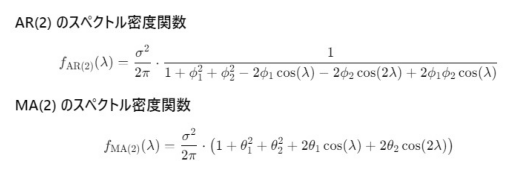

In [11]:
# 画像ファイルのパス
image_path = 'fomulas_2.jpg'

# 画像を読み込み
img = mpimg.imread(image_path)

# 画像を表示
plt.imshow(img)
plt.axis('off')  # 軸を非表示に
plt.show()

In [12]:
# スペクトル密度関数: MA(2)
def spectrum_density_ma2(theta1, theta2, sigma2, lambdas):
    return (sigma2 / (2 * np.pi)) * (1 + theta1**2 + theta2**2 + 2 * theta1 * np.cos(lambdas) + 2 * theta2 * np.cos(2 * lambdas))

# MA(2) モデルの時系列データ生成
def generate_ma2(theta1, theta2, n):
    ar = np.array([1])  # AR(0)
    ma = np.array([1, theta1, theta2])  # MA(2)の係数
    arma_process = ArmaProcess(ar, ma)
    return arma_process.generate_sample(nsample=n)

# スペクトル密度をプロットする関数（MA(2)）
def plot_spectrum_ma2(series, ax, theta1, theta2, sigma2=1):
    lambdas = np.linspace(0, np.pi, 500)
    f_lambda = spectrum_density_ma2(theta1, theta2, sigma2, lambdas)
    ax.plot(lambdas, f_lambda)
    ax.set_title(f'MA(2) Spectrum (theta1={theta1}, theta2={theta2})')
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel(r'$f_{\text{MA(2)}}(\lambda)$')
    ax.grid(True)

# AR(2)

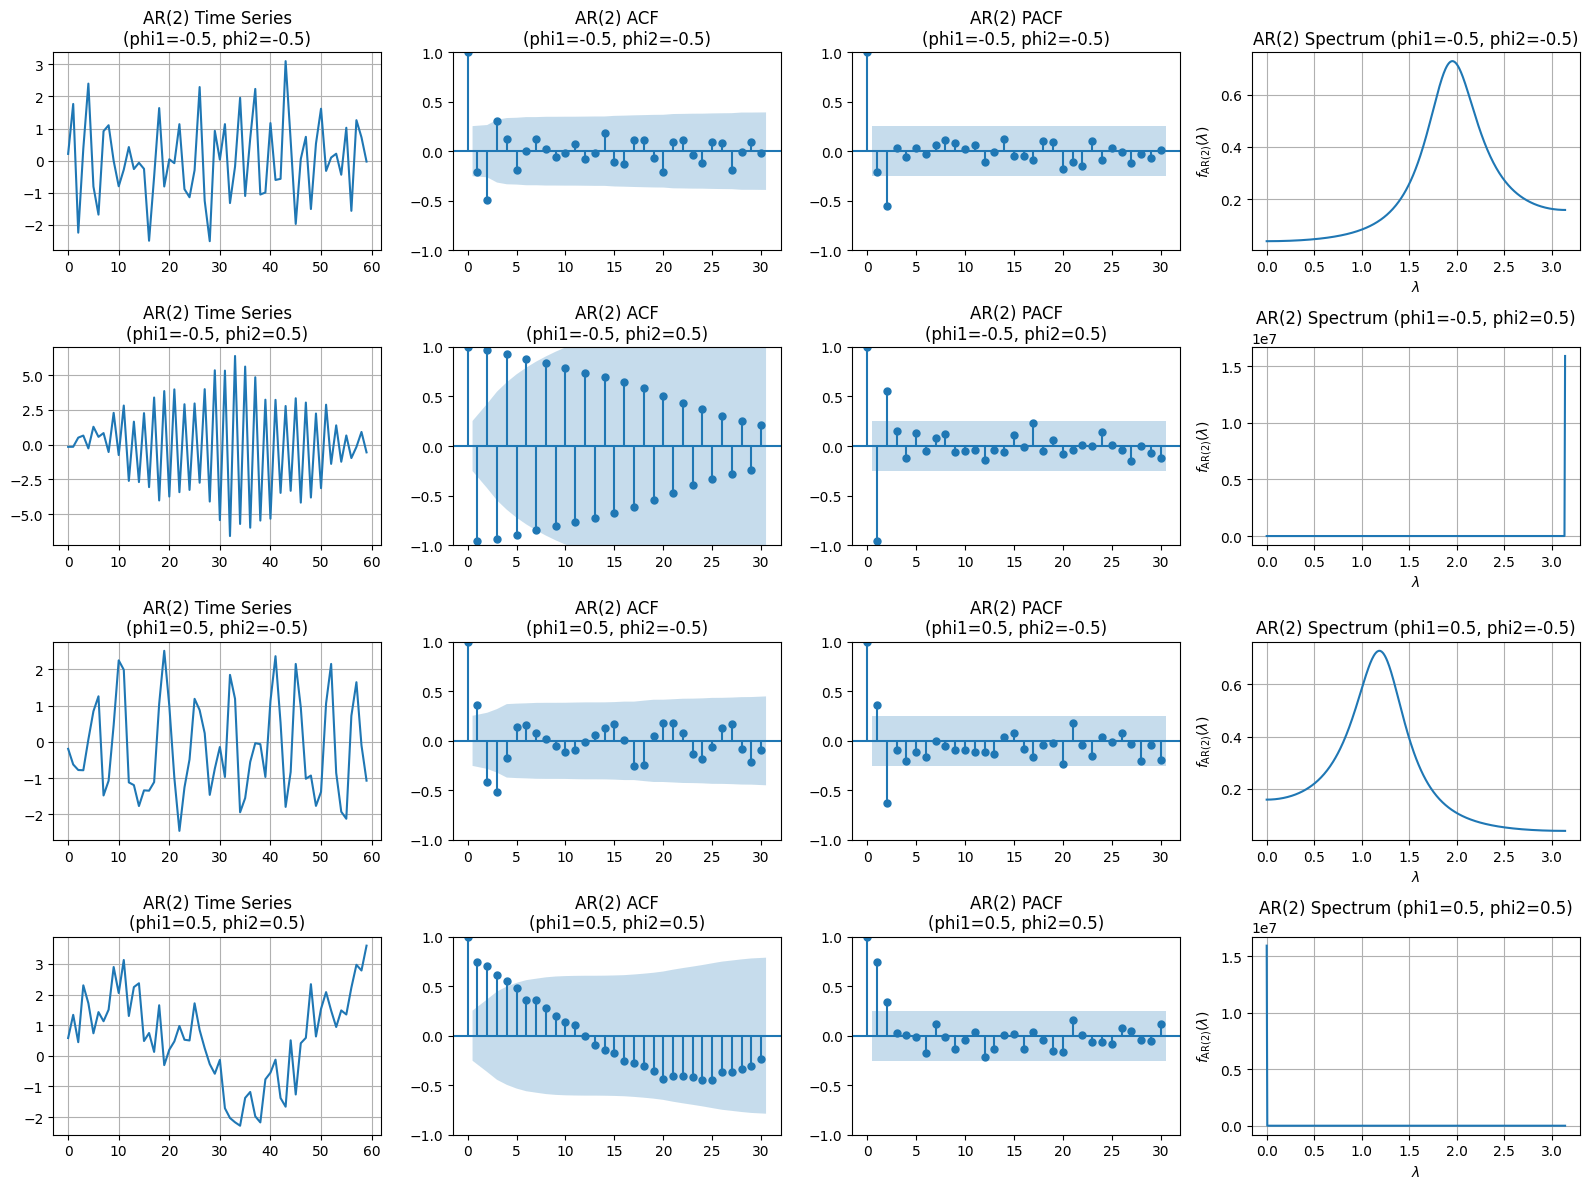

In [13]:
# パラメータ設定
n_samples = 60  # サンプル数
phi1_values = [-0.5, 0.5]  # AR(2)のφ1 
phi2_values = [-0.5, 0.5]  # AR(2)のφ2

# 行列形式でプロットするためのサブプロット設定
fig, axes = plt.subplots(len(phi1_values) * len(phi2_values), 4, figsize=(16, len(phi1_values) * len(phi2_values) * 3))

# 二重ループで φ1 と φ2 のすべての組み合わせを走査
row = 0
for phi1 in phi1_values:
    for phi2 in phi2_values:
        # AR(2)時系列データ生成
        ar2_series = generate_ar2(phi1=phi1, phi2=phi2, n=n_samples)
        
        # 各プロット
        plot_time_series(ar2_series, axes[row, 0], f'AR(2) Time Series\n(phi1={phi1}, phi2={phi2})')
        plot_acf(ar2_series, lags=30, ax=axes[row, 1], title=f'AR(2) ACF\n(phi1={phi1}, phi2={phi2})')
        plot_pacf(ar2_series, lags=30, ax=axes[row, 2], title=f'AR(2) PACF\n(phi1={phi1}, phi2={phi2})')
        plot_spectrum_ar2(ar2_series, ax=axes[row, 3], phi1=phi1, phi2=phi2)
        
        row += 1

# グラフを調整して表示
plt.tight_layout()
plt.show()

# MA(2)

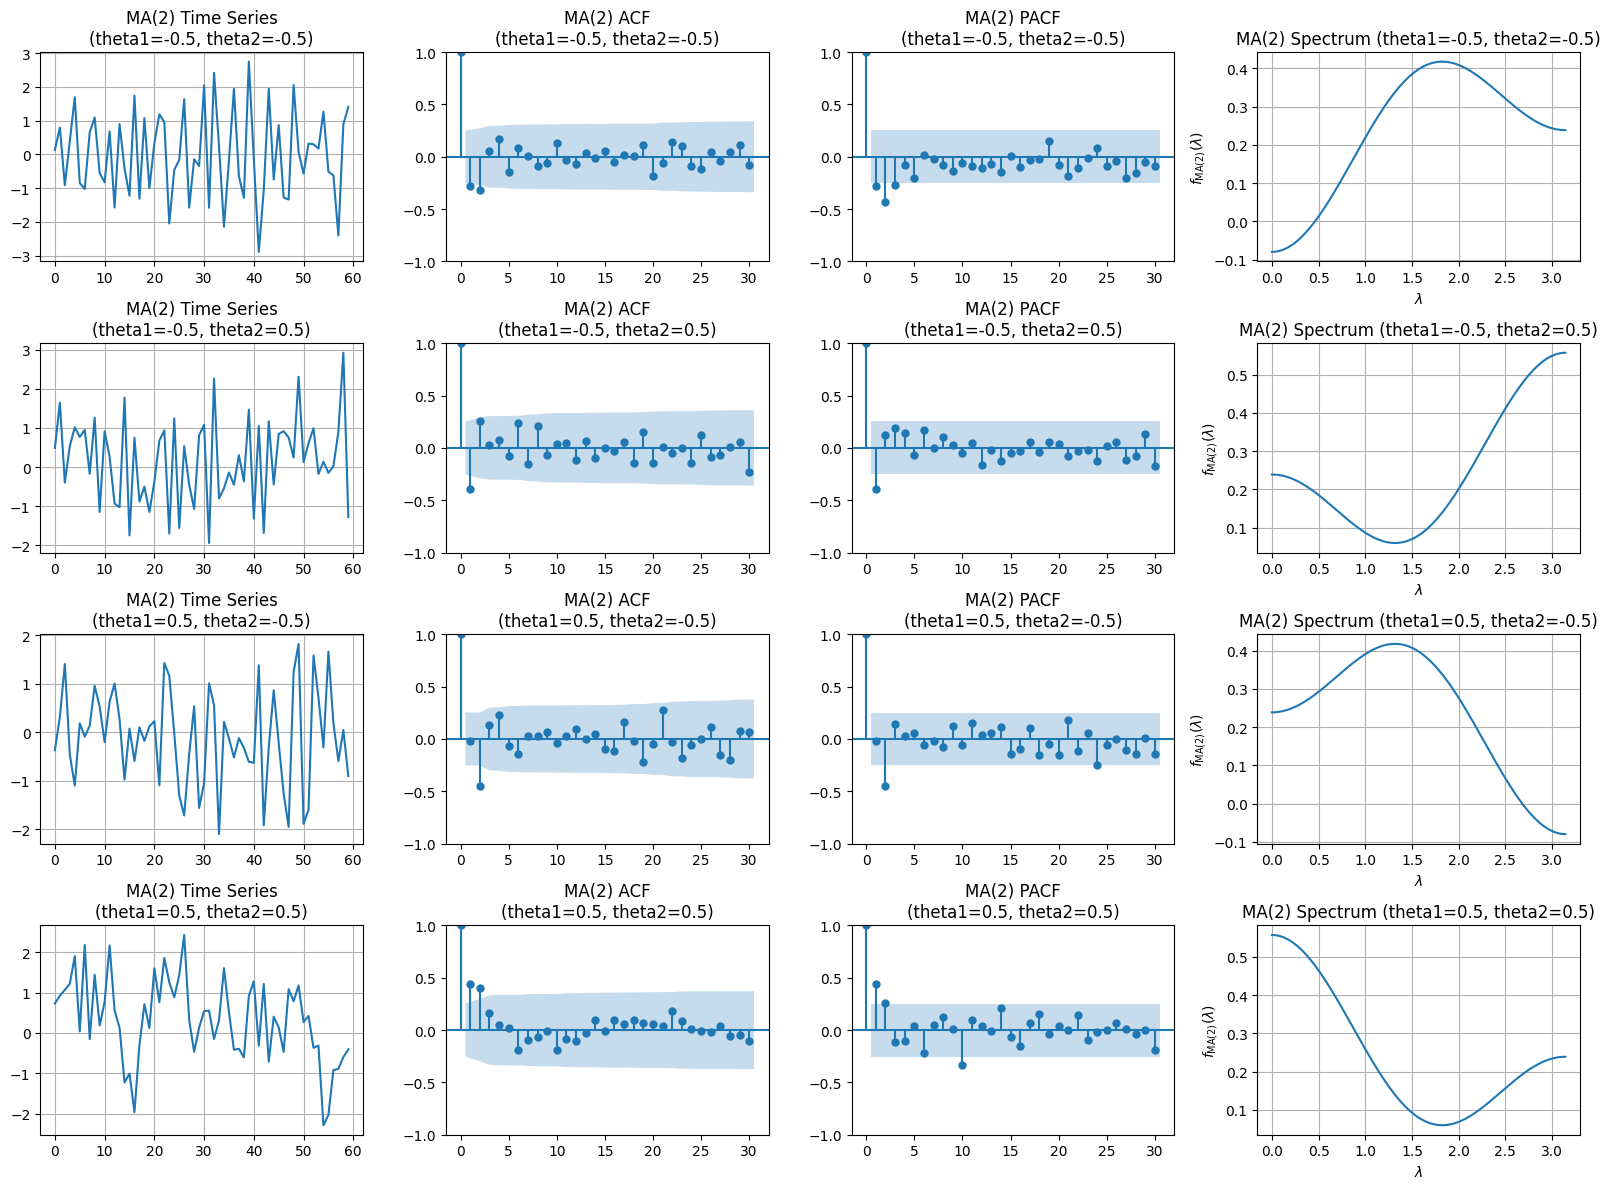

In [14]:
# パラメータ設定
n_samples = 60  # サンプル数
theta1_values = [-0.5, 0.5]  # MA(2)のθ1 
theta2_values = [-0.5, 0.5]  # MA(2)のθ2

# 行列形式でプロットするためのサブプロット設定
fig, axes = plt.subplots(len(theta1_values) * len(theta2_values), 4, figsize=(16, len(theta1_values) * len(theta2_values) * 3))

# 二重ループで θ1 と θ2 のすべての組み合わせを走査
row = 0
for theta1 in theta1_values:
    for theta2 in theta2_values:
        # MA(2)時系列データ生成
        ma2_series = generate_ma2(theta1=theta1, theta2=theta2, n=n_samples)
        
        # 各プロット
        plot_time_series(ma2_series, axes[row, 0], f'MA(2) Time Series\n(theta1={theta1}, theta2={theta2})')
        plot_acf(ma2_series, lags=30, ax=axes[row, 1], title=f'MA(2) ACF\n(theta1={theta1}, theta2={theta2})')
        plot_pacf(ma2_series, lags=30, ax=axes[row, 2], title=f'MA(2) PACF\n(theta1={theta1}, theta2={theta2})')
        plot_spectrum_ma2(ma2_series, ax=axes[row, 3], theta1=theta1, theta2=theta2)
        
        row += 1

# グラフを調整して表示
plt.tight_layout()
plt.show()